In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import pingouin as pg

In [53]:
import statsmodels.stats.outliers_influence as sms
from functools import reduce

In [29]:
import warnings
warnings.filterwarnings('ignore')

# Regression

### i) Simple Regression

#### Outcome = Model + Error
#### Sum of Squares, SSt, SSm , SSr

In [30]:
data = pd.read_csv('/home/atrides/Desktop/R/statistics_with_Python/07_Regression/Data_Files/Album Sales 1.dat', sep='\t')
print(data.head())

    adverts  sales
0    10.256    330
1   985.685    120
2  1445.563    360
3  1188.193    270
4   574.513    220


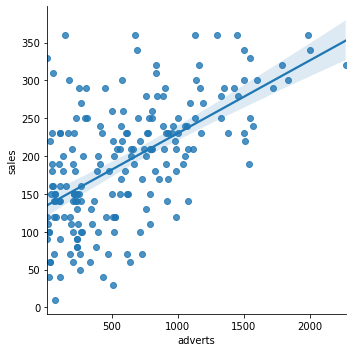

In [31]:
_ = sns.lmplot(x='adverts', y='sales', data=data)
plt.show()

In [32]:
model = sm.OLS.from_formula('sales ~ adverts',data=data)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     99.59
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           2.94e-19
Time:                        21:33:43   Log-Likelihood:                -1120.7
No. Observations:                 200   AIC:                             2245.
Df Residuals:                     198   BIC:                             2252.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    134.1399      7.537     17.799      0.0

### ii) Multiple Regression

In [33]:
df = pd.read_csv('/home/atrides/Desktop/R/statistics_with_Python/07_Regression/Data_Files/Album Sales 2.dat', sep='\t')
print(df.head())

    adverts  sales  airplay  attract
0    10.256    330       43       10
1   985.685    120       28        7
2  1445.563    360       35        7
3  1188.193    270       33        7
4   574.513    220       44        5


In [34]:
# with one predictor variable
model_1 = sm.OLS.from_formula("sales~adverts", data=df)
res_1 = model_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     99.59
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           2.94e-19
Time:                        21:33:49   Log-Likelihood:                -1120.7
No. Observations:                 200   AIC:                             2245.
Df Residuals:                     198   BIC:                             2252.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    134.1399      7.537     17.799      0.0

In [35]:
# with all predictor variables
model_2 = sm.OLS.from_formula("sales~adverts+airplay+attract", data=df)
res_2 = model_2.fit()
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     129.5
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           2.88e-46
Time:                        21:33:51   Log-Likelihood:                -1052.2
No. Observations:                 200   AIC:                             2112.
Df Residuals:                     196   BIC:                             2126.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -26.6130     17.350     -1.534      0.1

##### see the inrcrease in R^2 and Adjusted R^2 in model_2 w.r.t model_1

### Standarized regression coeffecients (beta coeffecients)
#####  refers to how many standard deviations a dependent variable will change, per standard deviation increase in the predictor variable.

In [36]:
df_ = pd.DataFrame()
df_['adverts'] = (df['adverts']-df['adverts'].mean())/df['adverts'].std()
df_['airplay'] = (df['airplay']-df['adverts'].mean())/df['airplay'].std()
df_['attract'] = (df['attract']-df['adverts'].mean())/df['attract'].std()
df_['sales'] = (df['sales']-df['adverts'].mean())/df['sales'].std()

In [37]:
model = sm.OLS.from_formula("sales~adverts+airplay+attract", data=df_)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     129.5
Date:                Tue, 15 Sep 2020   Prob (F-statistic):           2.88e-46
Time:                        21:33:53   Log-Likelihood:                -174.02
No. Observations:                 200   AIC:                             356.0
Df Residuals:                     196   BIC:                             369.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    102.7485     18.112      5.673      0.0

### Comparing models using python

In [38]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

m01 = ols('sales~adverts', data=df).fit()
m02 = ols('sales~adverts+airplay+attract', data=df).fit()
anovaResults = anova_lm(m01, m02)
print(anovaResults)

   df_resid            ssr  df_diff        ss_diff          F        Pr(>F)
0     198.0  862264.167468      0.0            NaN        NaN           NaN
1     196.0  434574.581730      2.0  427689.585738  96.447379  6.879395e-30


### Outliers and Influential cases

#### references

https://www.statsmodels.org/stable/generated/statsmodels.stats.outliers_influence.OLSInfluence.html#statsmodels.stats.outliers_influence.OLSInfluence

https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html

https://stackoverflow.com/questions/46304514/access-standardized-residuals-cooks-values-hatvalues-leverage-etc-easily-i

https://www.geeksforgeeks.org/reduce-in-python/

In [71]:
summary_frame = sms.OLSInfluence(m02).summary_frame()
summary_frame .head()

,dfb_Intercept,dfb_adverts,dfb_airplay,dfb_attract,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.315539,-0.242346,0.157739,0.353292,0.058704,2.177404,0.047191,0.484578,2.198596,0.489294
1,0.012593,-0.126374,0.009421,-0.018683,0.010889,-2.323083,0.008007,-0.208705,-2.349724,-0.211098
2,-0.038068,0.174929,0.046574,-0.005385,0.011401,1.468802,0.020700,0.213548,1.473180,0.214184
3,-0.002576,0.012163,0.003444,0.000129,0.000072,0.150116,0.012561,0.016931,0.149741,0.016889
4,-0.008583,0.001088,-0.014254,0.013554,0.000103,-0.123798,0.026065,-0.020253,-0.123487,-0.020202


In [72]:
summary_frame = summary_frame[['cooks_d','standard_resid', 'student_resid', 'hat_diag' ]]
summary_frame.head()

,cooks_d,standard_resid,student_resid,hat_diag
0,0.058704,2.177404,2.198596,0.047191
1,0.010889,-2.323083,-2.349724,0.008007
2,0.011401,1.468802,1.473180,0.020700
3,0.000072,0.150116,0.149741,0.012561
4,0.000103,-0.123798,-0.123487,0.026065


In [73]:
resid = pd.DataFrame(df['sales'] - m02.fittedvalues)
resid.columns = ['residual']

In [74]:
dfbeta = pd.DataFrame(pd.DataFrame(sms.OLSInfluence(m02).dfbeta)[0])
dfbeta.columns = ['dfbeta']

In [75]:
df_ = [df, resid, summary_frame, dfbeta]
final_summary = reduce(lambda left,right: pd.merge(left,right, left_index=True, right_index=True), df_)
final_summary.head()

,adverts,sales,airplay,attract,residual,cooks_d,standard_resid,student_resid,hat_diag,dfbeta
0,10.256,330,43,10,100.079745,0.058704,2.177404,2.198596,0.047191,-5.421827
1,985.685,120,28,7,-108.948992,0.010889,-2.323083,-2.349724,0.008007,0.216017
2,1445.563,360,35,7,68.442368,0.011401,1.468802,1.473180,0.020700,-0.658518
3,1188.193,270,33,7,7.024026,0.000072,0.150116,0.149741,0.012561,-0.044809
4,574.513,220,44,5,-5.752861,0.000103,-0.123798,-0.123487,0.026065,-0.149284


In [76]:
cov_ratio = pd.DataFrame(sms.OLSInfluence(m02).cov_ratio)
cov_ratio.columns = ['cov_ratio']

In [77]:
# these cases have somewhat large residuals
large_resid  = final_summary[(final_summary['standard_resid']>=2) | (final_summary['standard_resid']<=-2)]
large_resid = pd.merge(large_resid, cov_ratio, how = 'left', right_index=True, left_index=True)
large_resid

,adverts,sales,airplay,attract,residual,cooks_d,standard_resid,student_resid,hat_diag,dfbeta,cov_ratio
0,10.256,330,43,10,100.079745,0.058704,2.177404,2.198596,0.047191,-5.421827,0.971275
1,985.685,120,28,7,-108.948992,0.010889,-2.323083,-2.349724,0.008007,0.216017,0.920183
9,174.093,300,40,7,99.533751,0.017756,2.130289,2.149882,0.015410,-0.215971,0.943920
46,102.568,40,25,8,-114.969819,0.024115,-2.460996,-2.493538,0.015677,1.137816,0.914580
51,405.913,190,12,4,97.402661,0.033159,2.099446,2.118034,0.029213,6.069241,0.959953
54,1542.329,190,33,8,-114.123081,0.040416,-2.455913,-2.488224,0.026104,2.984377,0.924858
60,579.321,300,30,7,98.810295,0.005948,2.104079,2.122816,0.005346,0.014082,0.936538
67,56.895,70,37,7,-110.415642,0.022289,-2.363549,-2.391845,0.015709,-0.048133,0.923698
99,1000.000,250,5,7,97.286661,0.031364,2.095399,2.113858,0.027779,1.051349,0.958877
163,9.104,120,53,8,-121.324049,0.070766,-2.628814,-2.669584,0.039349,3.072359,0.920373


In [78]:
# now let's look at cooks distance, leverage, covariance Ratio for these cases
k = 3 #number of predictors
n = 200 #number of objervations

average_leverage = (k+1)/n
print(average_leverage)


0.02


In [79]:
cvr_limit_high = 1+3*average_leverage
cvr_limit_low  = 1-3*average_leverage

print(cvr_limit_low, cvr_limit_high)

0.94 1.06


#### from this large residual model we conclude that
#### Most of our 12 potential outliers have CVR values within or just outside the boundaries.
#### none of them has a Cook’s distance greater than 1,  so none of the cases is having an undue influence on the model.


#### So , Note:

#### i) Look at standardized residuals and check that no more than 5% of cases have absolute values above 2, 
####    and that no more than about 1% have absolute values above 2.5. Any case with a value above about 3 could be an outlier.

#### ii)Look at the values of Cook’s distance: any value above 1 indicates a case that might be influencing the model.

#### iii)Calculate the average leverage (the number of predictors plus 1, divided by the sample size) 
####      and then look for values greater than twice or three times this average value

#### iv)Calculate the upper and lower limit of acceptable values for the covariance ratio, CVR.
####        The upper limit is 1 plus three times the average leverage, whereas 
####        the lower limit is 1 minus three times the average leverage. 
####        Cases that have a CVR falling outside these limits may be problematic

## Testing Various Assumptions

### i) Assumptions of Independent Errors

In [80]:
from statsmodels.stats.stattools import durbin_watson
print(durbin_watson(m02.resid))

# The closer to 2 that the value is, the better, and for these data the value is 1.950,
# which is so close to 2 that the assumption has almost certainly been met.

1.9498189295800616


### ii) Assumption of no multicollinearity

In [81]:
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_ = add_constant(df)
df_.drop(['sales'], inplace=True,axis=1)  # dropping Dependent variable

In [82]:
vif = pd.Series([variance_inflation_factor(df_.values, i) 
               for i in range(1, df_.shape[1])], 
              index=df_.columns[1:])

In [83]:
print(vif)

adverts    1.014593
airplay    1.042504
attract    1.038455
dtype: float64


In [84]:
avg_vif  = np.mean(vif)
print(avg_vif)

1.0318504825952806


In [85]:
tolerance  = 1/vif
print(tolerance)

adverts    0.985617
airplay    0.959229
attract    0.962969
dtype: float64


#####  the assumption of multicollinearity is followed too

### iii) Assumption about the Residuals

In [86]:
prediction = pd.DataFrame(m02.fittedvalues)
prediction.columns = ['predicted']

In [87]:
prediction['standarized_prediction']  = (prediction['predicted']-prediction['predicted'].mean())/prediction['predicted'].std()
final_summary.head()

,adverts,sales,airplay,attract,residual,cooks_d,standard_resid,student_resid,hat_diag,dfbeta
0,10.256,330,43,10,100.079745,0.058704,2.177404,2.198596,0.047191,-5.421827
1,985.685,120,28,7,-108.948992,0.010889,-2.323083,-2.349724,0.008007,0.216017
2,1445.563,360,35,7,68.442368,0.011401,1.468802,1.473180,0.020700,-0.658518
3,1188.193,270,33,7,7.024026,0.000072,0.150116,0.149741,0.012561,-0.044809
4,574.513,220,44,5,-5.752861,0.000103,-0.123798,-0.123487,0.026065,-0.149284


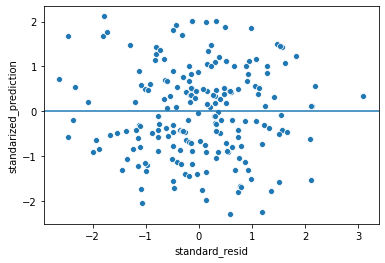

In [89]:
_ = sns.scatterplot(x= final_summary['standard_resid'], y = prediction['standarized_prediction'] )
_ = plt.axhline(y=0)
plt.show()

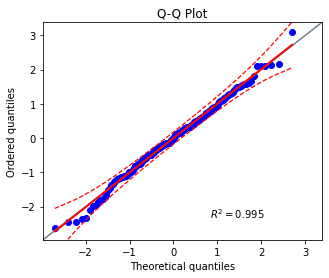

In [90]:
_ = pg.qqplot(final_summary['standard_resid'])
plt.show()

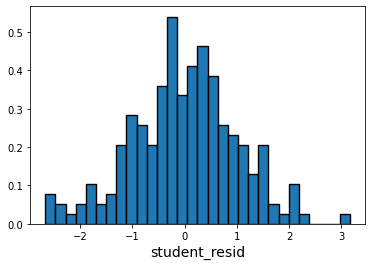

In [99]:
fig,ax = plt.subplots(figsize=(6, 4))
ax = plt.hist(final_summary['student_resid'],density=True,bins=30, edgecolor='black', linewidth=1.4)
plt.xlabel('student_resid', fontsize=14)
plt.show()

##### this assumption was also met